<a href="https://colab.research.google.com/github/kilos11/Data-Science-from-Scratch_-First-Principles-with-Python-by-Joel-Graus/blob/main/Chapter_5_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Describing a Single Set of Data**

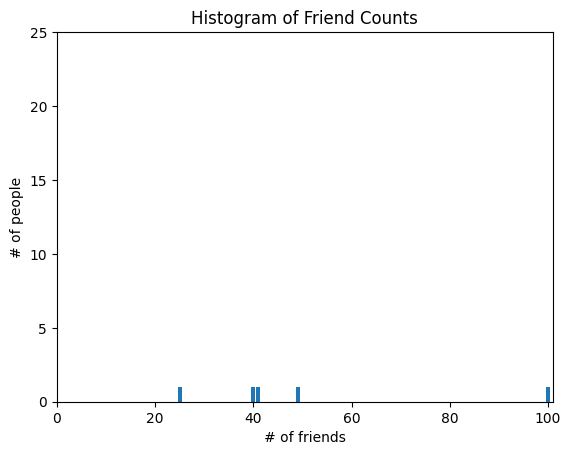

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

num_friends = [100, 49, 41, 40, 25,
# ... and lots more
]

friend_counts = Counter(num_friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

 Unfortunately, this chart is still too difficult to slip into conversations. So you start
generating some statistics. Probably the simplest statistic is simply the number of data
points:

In [4]:
num_points = len(num_friends) # 204

#You’re probably also interested in the largest and smallest values:
largest_value = max(num_friends) # 100
smallest_value = min(num_friends) # 1

#which are just special cases of wanting to know the values in specific positions:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0] # 1
second_smallest_value = sorted_values[1] # 1
second_largest_value = sorted_values[-2] # 49





**Central Tendencies**


In [6]:
# Import division from the __future__ module to ensure accurate division in Python 2.x
from __future__ import division

# Calculate the mean of a list of numbers
def mean(x):
    return sum(x) / len(x)

mean(num_friends)  # Returns 7.333333

# Calculate the median of a list of numbers
def median(v):
    """Finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        # If the length of v is odd, return the middle value
        return sorted_v[midpoint]
    else:
        # If the length of v is even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

median(num_friends)  # Returns 6.0

# Calculate the quantile of a list of numbers
def quantile(x, p):
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

quantile(num_friends, 0.10)  # Returns 1
quantile(num_friends, 0.25)  # Returns 3
quantile(num_friends, 0.75)  # Returns 9
quantile(num_friends, 0.90)  # Returns 13

# Calculate the mode(s) of a list of numbers
def mode(x):
    """Returns a list of the most common value(s) in x"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

mode(num_friends)  # Returns [1, 6]

41

# Dispersion
Dispersion refers to measures of how spread out our data is. Typically they’re statistics for
which values near zero signify not spread out at all and for which large values (whatever
that means) signify very spread out. For instance, a very simple measure is the range,
which is just the difference between the largest and smallest elements:


In [7]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

data_range(num_friends) # 99

#A more complex measure of dispersion is the variance, which is computed as:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends) # 81.54








75

# Correlation:

We’ll first look at covariance, the paired analogue of variance. Whereas variance
measures how a single variable deviates from its mean, covariance measures how two
variables vary in tandem from their means:



In [ ]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes) # 22.43

#it’s more common to look at the correlation, which divides out the
#standard deviations of both variables:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

correlation(num_friends, daily_minutes) # 0.25







